[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pushpavanthar/EIP2/blob/master/1st_DNN.ipynb)

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D , AveragePooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [3]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


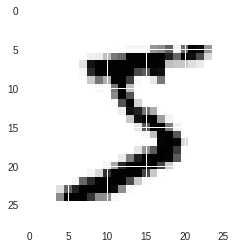

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, (3, 3), activation="relu"))
model.add(Convolution2D(10, (3, 3), activation="relu"))
model.add(AveragePooling2D(pool_size = (2, 2)))
# model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(Convolution2D(10, 11, activation="relu"))

# model.add(Convolution2D(10, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Activation('softmax'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 10)        910       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 10)        910       
_________________________________________________________________
average_pooling2d_1 (Average (None, 11, 11, 10)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 10)          12110     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [14]:
model.fit(X_train, Y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
60000/60000 [==============================] - 8s 127us/step - loss: 1.2193 - acc: 0.6138
Epoch 2/15
60000/60000 [==============================] - 6s 105us/step - loss: 1.0383 - acc: 0.6647
Epoch 3/15
60000/60000 [==============================] - 6s 105us/step - loss: 1.0128 - acc: 0.6708
Epoch 4/15
60000/60000 [==============================] - 6s 105us/step - loss: 1.0022 - acc: 0.6734
Epoch 5/15
60000/60000 [==============================] - 6s 105us/step - loss: 0.9966 - acc: 0.6746
Epoch 6/15
60000/60000 [==============================] - 6s 105us/step - loss: 0.9904 - acc: 0.6763
Epoch 7/15
60000/60000 [==============================] - 6s 105us/step - loss: 0.9866 - acc: 0.6770
Epoch 8/15
60000/60000 [==============================] - 6s 105us/step - loss: 0.9836 - acc: 0.6781
Epoch 9/15
60000/60000 [==============================] - 6s 105us/step - loss: 0.9803 - acc: 0.6790
Epoch 10/15
60000/60000 [==============================] - 6s 106us/step - loss: 0.9775 - a

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [103]:
print(score)

[0.03697019607952679, 0.9891]


In [0]:
y_pred = model.predict(X_test)

In [85]:
print(y_pred[:9])
print(y_test[:9])

[[5.0699203e-38 5.0699203e-38 5.0699203e-38 5.0699203e-38 5.0699203e-38
  5.0699203e-38 5.0699203e-38 1.0000000e+00 5.0699203e-38 5.0699203e-38]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.4932592e-26 1.0000000e+00 1.4932592e-26 1.4932592e-26 1.4932592e-26
  1.4932592e-26 1.4932592e-26 1.4932592e-26 1.4932592e-26 1.4932592e-26]
 [1.0000000e+00 1.0877174e-34 5.0698201e-32 1.0877174e-34 1.0877174e-34
  1.0877174e-34 1.0877174e-34 1.0877174e-34 1.0877174e-34 1.0877174e-34]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [5.1135891e-36 1.0000000e+00 5.1135891e-36 5.1135891e-36 5.1135891e-36
  5.1135891e-36 5.1135891e-36 6.5574245e-34 5.1135891e-36 5.1135891e-36]
 [2.0797198e-26 2.0797198e-26 2.0797198e-26 2.0797198e-26 1.0000000e+00
  2.0797198e-26 2.0797198e-26 2.0797198e-26 2.0797198e-26 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

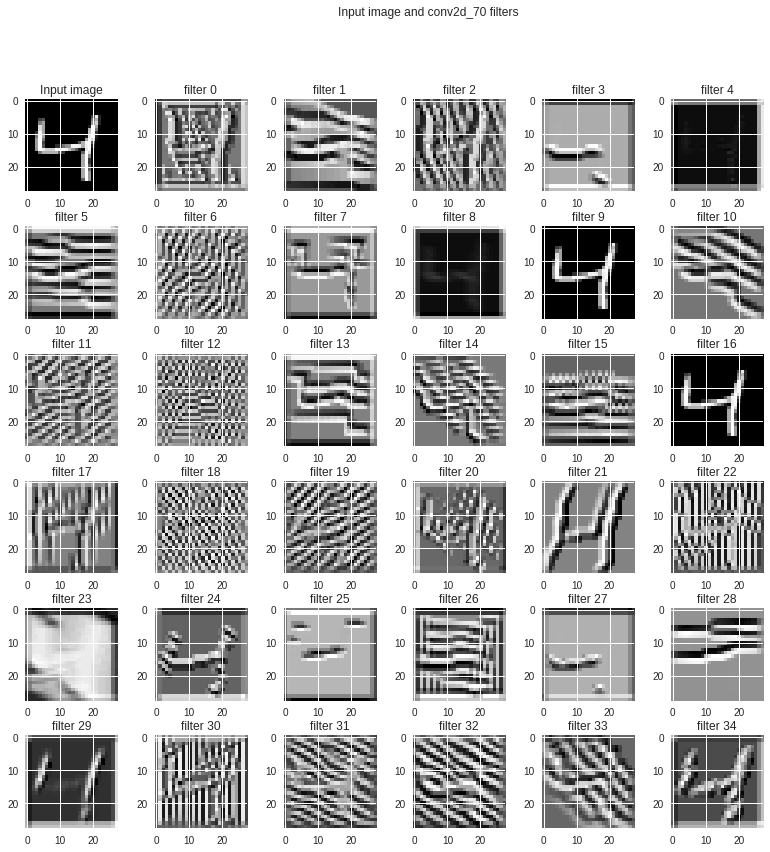

In [87]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_5'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()